In [23]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


In [24]:
#Load the dataset
dataset=pd.read_csv('/kaggle/input/sf-salaries/Salaries.csv')

****Initial Data Exploration****

In [25]:
dataset.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [26]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


Algoritma sayısal değerlerde ve kütüphanelerin doğru çalışması için veri tipini 
değiştirdim.

****Data Cleaning and Preprocessing****

In [27]:
# Convert columns to appropriate data types
dataset['BasePay'] = pd.to_numeric(dataset['BasePay'], errors='coerce')
dataset['OvertimePay'] = pd.to_numeric(dataset['OvertimePay'], errors='coerce')
dataset['OtherPay'] = pd.to_numeric(dataset['OtherPay'], errors='coerce')
dataset['Benefits'] = pd.to_numeric(dataset['Benefits'], errors='coerce')


In [28]:
# Check for missing values
dataset.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [29]:
dataset.fillna(0, inplace=True)

Veri setimizdeki eksik değerleri (NaN ,null) 0 ile doldurdum.

****Salary Distribution****

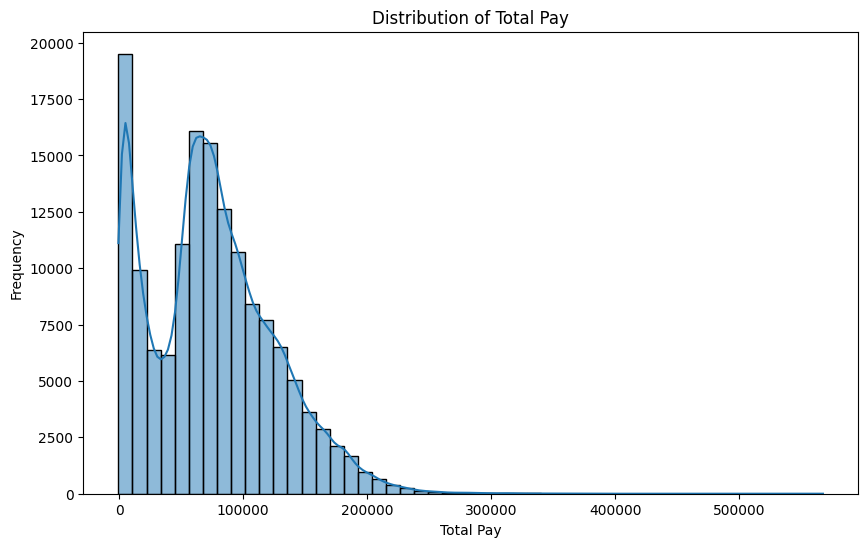

In [30]:
#Plot the distribution of TotalPay

plt.figure(figsize=(10,6))
sns.histplot(dataset['TotalPay'], bins=50, kde=True)
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

****Correlation Analysis****

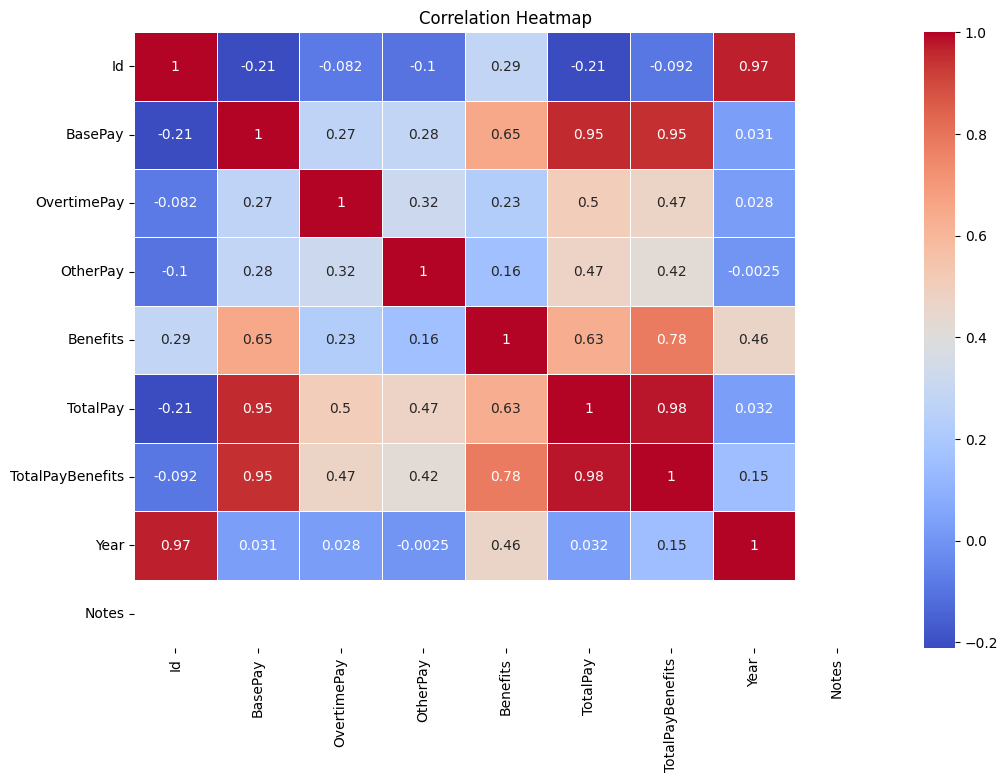

In [31]:
numeric_dataset=dataset.select_dtypes(include=[np.number])
correlation_matrix=numeric_dataset.corr()

#Plot the correlation heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Korelasyon matrisini incelediğimde pozitif değerler olduğunu gördüm bu yüzden Doğrusal Regresyon algoritmasının uygun olduğuna karar verdim.

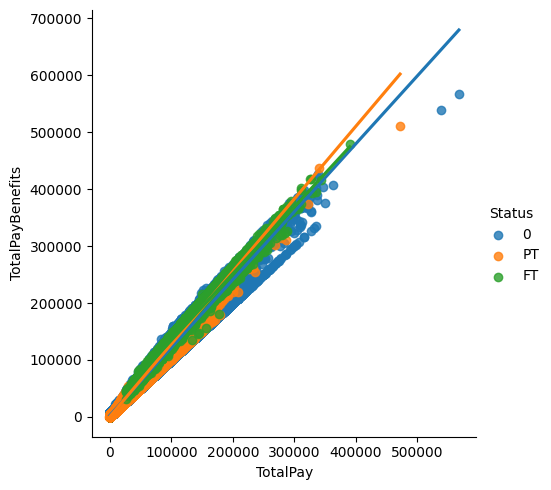

In [32]:
sns.lmplot(dataset, x = 'TotalPay', y = 'TotalPayBenefits', hue = 'Status')

In [33]:
# Supervised Learning - Linear Regression
# Preparing the data for supervised learning
X = dataset[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']]  # Features
y = dataset['TotalPay']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training - Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Model predictions
y_pred = lin_reg.predict(X_test)

# Model evaluation - Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Cross-validation to evaluate the model performance
cv_scores = cross_val_score(lin_reg, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Cross-validation score: {cv_scores.mean()}")

# Hyperparameter Tuning with GridSearchCV for Regression Models
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
grid = GridSearchCV(lin_reg, param_grid, cv=5, verbose=2)
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

# Model Evaluation (Regression)
print("Final model performance after hyperparameter tuning:")
y_final_pred = grid.predict(X_test)
final_mse = mean_squared_error(y_test, y_final_pred)
final_mae = mean_absolute_error(y_test, y_final_pred)

print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

Mean Squared Error (MSE): 5.9808455765300195e-22
Mean Absolute Error (MAE): 1.7385706083070147e-11
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean Cross-validation score: 1.0
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_interce

Çapraz doğrulama puanı 1.0, bu modelin tüm veriler için neredeyse kusursuz tahminler yaptığını gösterir diyebiliriz.Bu durum aşırı öğrenme belirtisi de olabilir, yani model eğitim verisine çok fazla uyum sağlamış olabilir olduğunu düşünürüz.

* Bu modeli 5 katlı çapraz doğrulama ile eğitip test ettik.
* 4 farklı hiperparametre kombinasyonu denedik.Bu kombinasyonlarda fit_intercept ve positive parametrelerinin farklı değerleri bulunmakta.
* Her kombinasyon 5 kat üzerinde denediğimiz için toplamda 20 farklı model eğitilip test edildi.

